In [32]:
startLifetime = {}
endLifeTime = {}

In [33]:
with open('newLifeTime.txt', 'r') as files:
    for line in files:
        parts = line.split(':')
        node = parts[2].split('[')[1].split(']')[0]
        lifeTime = parts[3].strip()
        startLifetime[node] = lifeTime
        #print(f'{node} : {lifeTime}')

In [34]:
with open('newLifeTimeDPC.txt', 'r') as files :
    for line in files :
        parts = line.split(':')
        node = parts[2].split('[')[1].split(']')[0]
        lifeTime = parts[3].strip()
        endLifeTime[node] = lifeTime

In [37]:
lf = {}

In [46]:
for sNode, sTime in startLifetime.items() :
    if sNode in endLifeTime :
        lf[sNode] = float(endLifeTime[sNode]) - float(sTime)

In [71]:
from collections import defaultdict
import csv

# 파일 경로
start_file = "route_lifetime_start.txt"
end_file = "route_lifetime_end.txt"
output_file = "route_lifetime_result.txt"

# 경로 시작 시각 불러오기
start_times = defaultdict(list)
with open(start_file, "r") as f:
    for line in f:
        dest, node, time = line.strip().split(",")
        start_times[(dest, node)].append(float(time))

# 경로 종료 시각 불러오기
end_times = defaultdict(list)
with open(end_file, "r") as f:
    for line in f:
        dest, node, time = line.strip().split(",")
        end_times[(dest, node)].append(float(time))

# 매칭 및 출력
with open(output_file, "w") as out:
    out.write("Node,Destination,Lifetime_Start,Lifetime_End,Duration\n")
    for key in start_times:
        starts = start_times[key]
        ends = end_times.get(key, [])

        # 매칭 가능한 만큼만 처리
        for start_time in starts:
            # end 중 가장 가까운 값 찾기
            matched_end = None
            for i, end_time in enumerate(ends):
                if end_time > start_time:
                    matched_end = end_time
                    del ends[i]
                    break
            if matched_end:
                duration = matched_end - start_time
                out.write(f"{key[1]},{key[0]},{start_time:.6f},{matched_end:.6f},{duration:.6f}\n")


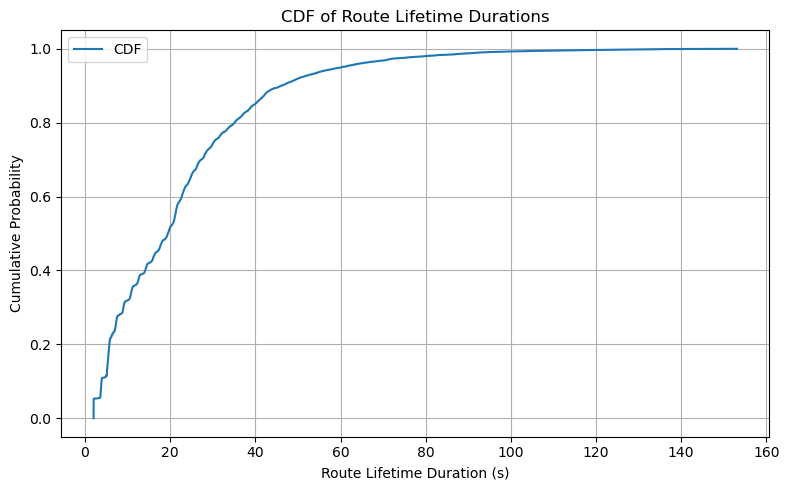

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 파일 경로
filename = "route_lifetime_result.txt"  # 또는 .csv로 변경

# 데이터 읽기
df = pd.read_csv(filename)

# Duration 값만 정렬
durations = np.sort(df["Duration"].values)

# CDF 계산
cdf = np.arange(1, len(durations)+1) / len(durations)

# 그래프
plt.figure(figsize=(8, 5))
plt.plot(durations, cdf, linestyle='-', label='CDF')
plt.xlabel("Route Lifetime Duration (s)")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Route Lifetime Durations")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


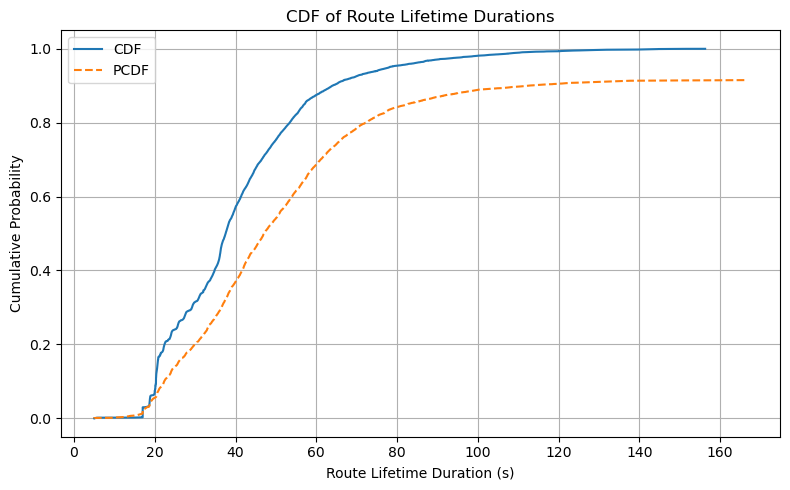

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 파일 경로
filename = "route_lifetime_result.txt"  # 또는 .csv로 변경
p_filename = 'route_lifetime_result_p.txt'

# 데이터 읽기
df = pd.read_csv(filename)
p_df = pd.read_csv(p_filename)

# Duration 값만 정렬
durations = np.sort(df["Duration"].values)
p_durations = np.sort(p_df['Duration'].values)

# CDF 계산
cdf = np.arange(1, len(durations) + 1) / len(durations)
p_cdf = np.arange(1, len(p_durations) + 1) / len(durations)

# 그래프
plt.figure(figsize=(8, 5))
plt.plot(durations, cdf, linestyle='-', label='CDF')
plt.plot(p_durations, p_cdf, linestyle='--', label='PCDF')
plt.xlabel("Route Lifetime Duration (s)")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Route Lifetime Durations")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [64]:
import pandas as pd

# 로그 파일 로드
create_df = pd.read_csv("route_lifetime_create.csv", header=None, names=["Time", "Node", "Destination"])
delete_df = pd.read_csv("route_lifetime_delete.csv", header=None, names=["Time", "Node", "Destination"])

# 정렬
create_df.sort_values(by="Time", inplace=True)
delete_df.sort_values(by="Time", inplace=True)

# 결과 저장용
results = []

# 각 Node-Destination 조합별로 처리
for key, group in create_df.groupby(["Node", "Destination"]):
    creates = list(group["Time"])
    deletes = list(delete_df[(delete_df["Node"] == key[0]) & (delete_df["Destination"] == key[1])]["Time"])

    i = j = 0
    while i < len(creates) and j < len(deletes):
        start = creates[i]
        end = deletes[j]
        if end > start:
            results.append({
                "Node": key[0],
                "Destination": key[1],
                "Lifetime_Start": start,
                "Lifetime_End": end,
                "Duration": end - start
            })
            i += 1
            j += 1
        else:
            j += 1  # 건너뛰기

# 결과 저장
result_df = pd.DataFrame(results)
result_df.to_csv("route_lifetime_result.csv", index=False)
print(result_df.head())


      Node  Destination  Lifetime_Start  Lifetime_End   Duration
0  node[0]     10.0.0.9       40.670663    118.863712  78.193049
1  node[0]   10.0.1.104       89.659057    131.646868  41.987811
2  node[0]   10.0.1.242       89.574615    130.695438  41.120824
3  node[0]    10.0.10.8       73.087913    111.359050  38.271137
4  node[0]  10.0.12.255      144.096308    189.353704  45.257396


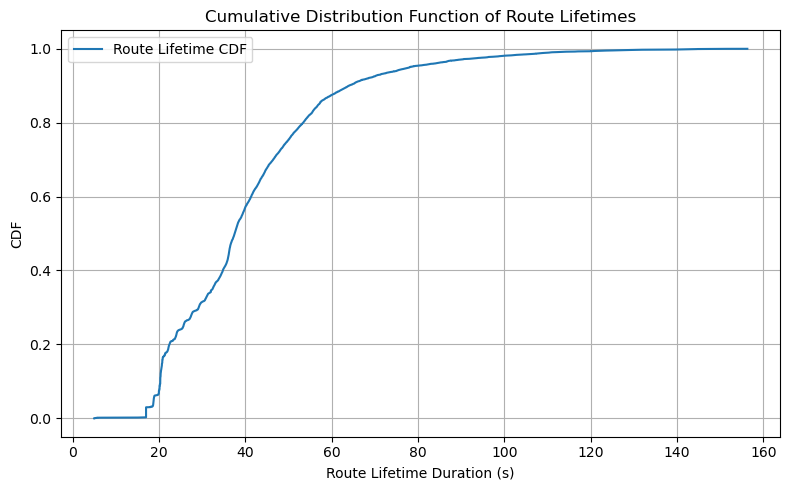

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 로딩
df = pd.read_csv("route_lifetime_result.csv")

# Duration 추출 및 정렬
durations = df["Duration"].dropna().sort_values().values

# CDF 계산
cdf = np.arange(1, len(durations) + 1) / len(durations)

# 그래프
plt.figure(figsize=(8, 5))
plt.plot(durations, cdf, linestyle='-', marker='', label='Route Lifetime CDF')

# 옵션
plt.xlabel("Route Lifetime Duration (s)")
plt.ylabel("CDF")
plt.title("Cumulative Distribution Function of Route Lifetimes")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


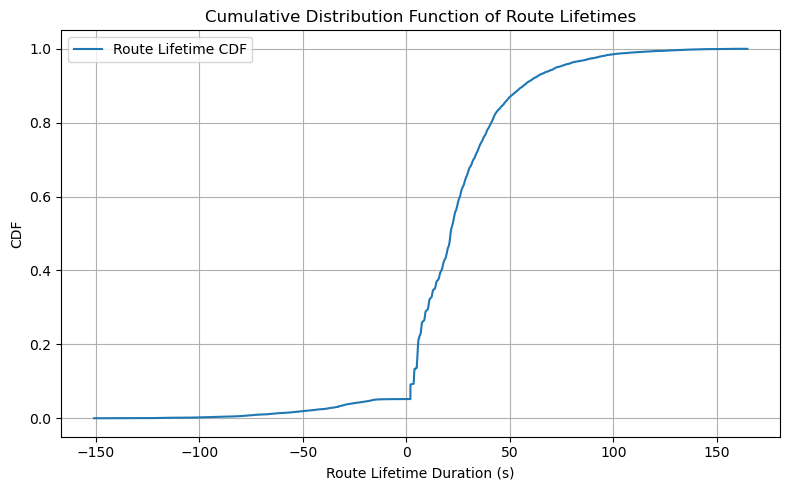

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 파일 경로 설정
delete_path = "route_lifetime_delete.txt"
create_path = "route_lifetime_start.txt"

# 2. 파일 불러오기 (구조 주의)
delete_df = pd.read_csv(delete_path, names=["Time_end", "Node", "Destination"])
create_df = pd.read_csv(create_path, names=["Destination", "Node", "Time_start"])

# 3. 키 기준 병합
merged = pd.merge(create_df, delete_df, on=["Node", "Destination"])

# 4. 지속 시간 계산
merged["Duration"] = merged["Time_end"] - merged["Time_start"]

# 5. 정렬 및 저장
merged = merged[["Node", "Destination", "Time_start", "Time_end", "Duration"]]
merged.to_csv("route_lifetime_result.csv", index=False)

# 6. CDF 계산
durations = merged["Duration"].dropna().sort_values().values
cdf = np.arange(1, len(durations)+1) / len(durations)

# 7. CDF 시각화
plt.figure(figsize=(8, 5))
plt.plot(durations, cdf, label="Route Lifetime CDF")
plt.xlabel("Route Lifetime Duration (s)")
plt.ylabel("CDF")
plt.title("Cumulative Distribution Function of Route Lifetimes")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
